# Cookie problem

There are 2 cookie jars:

* Jar 1 has 30 vanilla cookies and 10 chocolate cookies
* Jar 2 has 20 vanilla cookies and 20 chocolate cookies

You randomly pick one cookie from one randomly chosen jar. It is vanilla. What is the probability it was from Jar 1?

So we are looking for P(Jar 1 | Vanilla).

## Analytic Solution

Given Bayes' Rule:
\begin{equation*}
P(A|B) = \frac{P(B|A) P(A)}{P(B)}
\end{equation*}

We Can write:

\begin{equation*}
P(Jar_1 | Vanilla) = \frac{P(Vanilla | Jar_1) P(Jar_1)}{P(Vanilla)}
\end{equation*}

In [6]:
p_vanilla_given_jar_1 = 30/(30+10)
p_jar_1 = 1/2
p_vanilla = (30+20) / (30+10 + 20+20)
p_jar_1_given_vanilla = (p_vanilla_given_jar_1 * p_jar_1) / p_vanilla
print('P(Jar 1 | Vanilla) = {}'.format(p_jar_1_given_vanilla))

P(Jar 1 | Vanilla) = 0.6


## Monte Carlo Solution

In [9]:
import random


def choose_cookie(jar_num):
    """ Return True for Vanilla and False for Chocolate"""
    if jar_num == 1:
        return random.random() <= (30/40)
    else:
        return random.random() <= (20/40)

def choose_jar():
    if random.random() <= 0.5:
        return 1
    else:
        return 2

num_trials = 1000000
vanilla_count = 0
jar_1_given_vanilla_count = 0

for trial in range(num_trials):
    jar_num = choose_jar()
    is_vanilla = choose_cookie(jar_num)
    if is_vanilla:
        vanilla_count += 1
        if jar_num == 1:
            jar_1_given_vanilla_count += 1

print('P(Jar 1 | Vanilla) = {}'.format(jar_1_given_vanilla_count / vanilla_count))
    

P(Jar 1 | Vanilla) = 0.6007661068193756


## Visualization of change in belief

The 'prior' is our belief that Jar 1 is the chosen jar prior to seeing which cookie was chosen. The 'posterior' is our belief that Jar1 is the chosen jar after seeing which cookie was chosen.

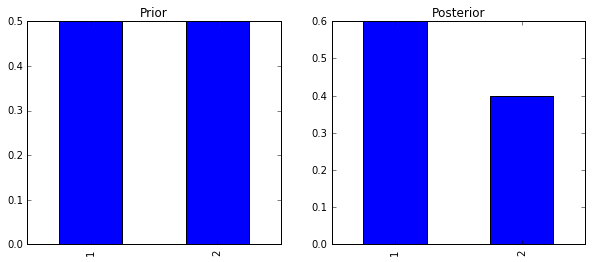

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import functools
%matplotlib inline

cookie_prior = [0.5, 0.5]
cookie_posterior = [0.6, 0.4]

ys = [cookie_prior, cookie_posterior]
x_ax = [1, 2]

fig, axs = plt.subplots(ncols=2, figsize=(10, 4))
for i, y_ax in enumerate(ys):
    pd.Series(y_ax, index=x_ax).plot(kind='bar', ax=axs[i])
    if i == 0:
        axs[i].set_title('Prior')
    else:
        axs[i].set_title('Posterior')